In [1]:
%matplotlib
%matplotlib inline
import sys
import math
import numpy
sys.path.append('..')
import gillespy
import matplotlib.pyplot as plt

Using matplotlib backend: MacOSX


In [2]:
import os
import urllib2
import tempfile
#sbml_file = 'http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000010'
#sbml_file = 'http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000017'
sbml_file = 'http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000028'
response = urllib2.urlopen(sbml_file)
tmp = tempfile.NamedTemporaryFile(delete = False)
tmp.write(response.read())
tmp.close()
######

sbml_model, errors = gillespy.import_SBML(tmp.name)
print os.linesep.join([error for error, code in errors])
print "-----"
os.remove(tmp.name)
######


Compartment 'cell' found on line '92' with volume '1.0' and dimension '3'. gillespy assumes a single well-mixed, reaction volume
-----


In [3]:
dresults = sbml_model.run(solver=gillespy.StochKitODESolver, debug=True, show_labels=False)

cmd: /Users/brian/Desktop/research/StochKit_ode/stochkit_ode.py --model /var/folders/cv/pt8dqm555sg1rj9w846bsz880000gn/T/tmpAflCWN/temp_input_5b6d1320-ed0a-4a1e-a9ec-ec1594d26b08.xml --out-dir /var/folders/cv/pt8dqm555sg1rj9w846bsz880000gn/T/tmpAflCWN/output/5b6d1320-ed0a-4a1e-a9ec-ec1594d26b08 -t 20.0 -i 400 
StochKitODESolver.get_trajectories(outdir=/var/folders/cv/pt8dqm555sg1rj9w846bsz880000gn/T/tmpAflCWN/output/5b6d1320-ed0a-4a1e-a9ec-ec1594d26b08
prefix_basedir=/var/folders/cv/pt8dqm555sg1rj9w846bsz880000gn/T/tmpAflCWN
STDOUT: StochKit WARNING (Input_ODE_before_compile_mixed::getODEReady): no volume parameter is specified, assuming model file is written in concentration style.

Final Statistics

nst     =   220

nfe     =   249
netf    =     2    nsetups  =    37
nni     =   245    ncfn     =     0

nje    =     4    nfeLS     =    64
StochKit MESSAGE: compiling generated code...this will take a few moments...
Output written to file /var/folders/cv/pt8dqm555sg1rj9w846bsz880000gn/

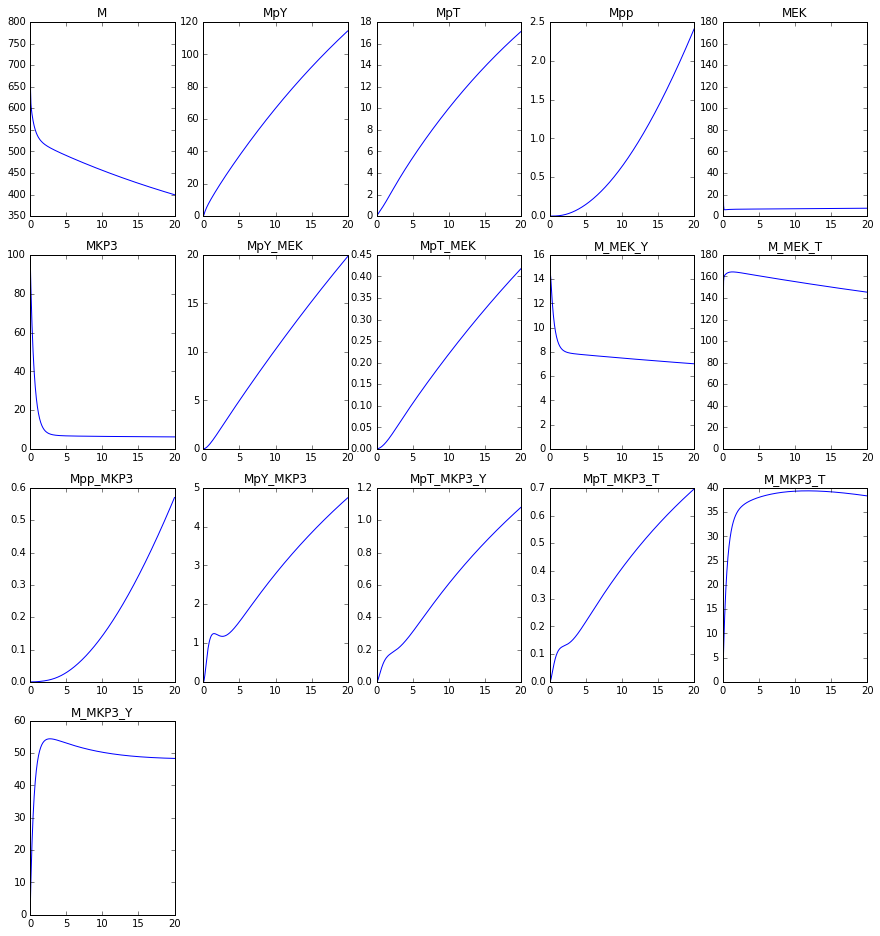

In [4]:
ns = len(sbml_model.listOfSpecies)
plt.figure(figsize=(15,4*int(math.ceil(ns/5.0))))
for n,s in enumerate(sbml_model.listOfSpecies):
    plt.subplot(int(math.ceil(ns/5.0)),5,n+1)
    plt.plot(dresults[0][:,0],dresults[0][:,n+1])
    plt.title(s)

In [5]:
sbml_model.name

'Markevich2004_MAPK_phosphoRandomElementary'

In [6]:
for r in sbml_model.listOfReactions:
    print "{0}\t{1}".format(r,sbml_model.listOfReactions[r].propensity_function)

reaction_0000001	cell * (k1 * M * MEK - k_1 * M_MEK_Y)
reaction_0000002	cell * k2 * M_MEK_Y
reaction_0000003	cell * (k3 * MpY * MEK - k_3 * MpY_MEK)
reaction_0000004	cell * k4 * MpY_MEK
reaction_0000005	cell * (k5 * M * MEK - k_5 * M_MEK_T)
reaction_0000006	cell * k6 * M_MEK_T
reaction_0000007	cell * (k7 * MpT * MEK - k_7 * MpT_MEK)
reaction_0000008	cell * k8 * MpT_MEK
reaction_0000009	cell * (h1 * Mpp * MKP3 - h_1 * Mpp_MKP3)
reaction_0000010	cell * h2 * Mpp_MKP3
reaction_0000011	cell * (h3 * MpT_MKP3_Y - h_3 * MpT * MKP3)
reaction_0000012	cell * h5 * MpT_MKP3_T
reaction_0000013	cell * (h4 * MpT * MKP3 - h_4 * MpT_MKP3_T)
reaction_0000014	cell * h8 * MpY_MKP3
reaction_0000015	cell * (h6 * M_MKP3_T - h_6 * M * MKP3)
reaction_0000017	cell * (h7 * MpY * MKP3 - h_7 * MpY_MKP3)
reaction_0000019	cell * (h9 * M_MKP3_Y - h_9 * M * MKP3)


In [7]:
new_rxns = []
for rname in sbml_model.listOfReactions:
    r = sbml_model.listOfReactions[rname]
    #print r.propensity_function
    rxns = r.propensity_function.replace('cell * ','').replace('(','').replace(')','').split('-')
    #print rxns, r.reactants, r.products
    r1 = gillespy.Reaction(name=r.name,  reactants=r.reactants, 
                           products=r.products,
                           propensity_function = rxns[0])
    new_rxns.append(r1)
    if len(rxns) > 1:
        r2 = gillespy.Reaction(name=r.name+'__reverse',  
                               reactants=r.products, 
                               products=r.reactants,
                               propensity_function = rxns[1])
    
        new_rxns.append(r2)
    
    
print new_rxns


[<gillespy.gillespy.Reaction instance at 0x113b71830>, <gillespy.gillespy.Reaction instance at 0x1146aa9e0>, <gillespy.gillespy.Reaction instance at 0x114685f38>, <gillespy.gillespy.Reaction instance at 0x113b46518>, <gillespy.gillespy.Reaction instance at 0x113e33998>, <gillespy.gillespy.Reaction instance at 0x113e33878>, <gillespy.gillespy.Reaction instance at 0x1147048c0>, <gillespy.gillespy.Reaction instance at 0x113db3d40>, <gillespy.gillespy.Reaction instance at 0x113db3c68>, <gillespy.gillespy.Reaction instance at 0x11463c0e0>, <gillespy.gillespy.Reaction instance at 0x11463cfc8>, <gillespy.gillespy.Reaction instance at 0x11463ce60>, <gillespy.gillespy.Reaction instance at 0x11463cea8>, <gillespy.gillespy.Reaction instance at 0x11457a830>, <gillespy.gillespy.Reaction instance at 0x11457abd8>, <gillespy.gillespy.Reaction instance at 0x11457ad40>, <gillespy.gillespy.Reaction instance at 0x11457a6c8>, <gillespy.gillespy.Reaction instance at 0x11457a9e0>, <gillespy.gillespy.Reaction

In [8]:
for s in sbml_model.listOfSpecies:
    print s,sbml_model.listOfSpecies[s].initial_value

M 800
MpY 0
MpT 0
Mpp 0
MEK 180
MKP3 100
MpY_MEK 0
MpT_MEK 0
M_MEK_Y 0
M_MEK_T 0
Mpp_MKP3 0
MpY_MKP3 0
MpT_MKP3_Y 0
MpT_MKP3_T 0
M_MKP3_T 0
M_MKP3_Y 0


In [9]:
r = sbml_model.listOfReactions['reaction_0000001']
print r.propensity_function
print r.propensity_function.replace('(','').replace(')','').split()

cell * (k1 * M * MEK - k_1 * M_MEK_Y)
['cell', '*', 'k1', '*', 'M', '*', 'MEK', '-', 'k_1', '*', 'M_MEK_Y']


In [10]:
sbml_model.listOfReactions

OrderedDict([('reaction_0000001',
              <gillespy.gillespy.Reaction instance at 0x113573cf8>),
             ('reaction_0000002',
              <gillespy.gillespy.Reaction instance at 0x113573d40>),
             ('reaction_0000003',
              <gillespy.gillespy.Reaction instance at 0x113573d88>),
             ('reaction_0000004',
              <gillespy.gillespy.Reaction instance at 0x113573dd0>),
             ('reaction_0000005',
              <gillespy.gillespy.Reaction instance at 0x113573e18>),
             ('reaction_0000006',
              <gillespy.gillespy.Reaction instance at 0x113573e60>),
             ('reaction_0000007',
              <gillespy.gillespy.Reaction instance at 0x113573ea8>),
             ('reaction_0000008',
              <gillespy.gillespy.Reaction instance at 0x113573ef0>),
             ('reaction_0000009',
              <gillespy.gillespy.Reaction instance at 0x113573f38>),
             ('reaction_0000010',
              <gillespy.gillespy.Reacti

In [11]:
'''If we assume the volume is 1.0, we can use the existing propensity 
functions when we convert to a stochastic model.'''
class Markevich2004_MAPK_phosphoRandomElementary(gillespy.Model):
    def __init__(self, concentration_model):
        gillespy.Model.__init__(self, name="Markevich2004_MAPK_phosphoRandomElementary")
        
        for s in concentration_model.listOfSpecies:
            self.add_species(gillespy.Species(name=s, initial_value=int(concentration_model.listOfSpecies[s].initial_value)))
            
        for p in concentration_model.listOfParameters:
            self.add_parameter(concentration_model.listOfParameters[p])
            
        #for r in concentration_model.listOfReactions:
        #    self.add_reaction(concentration_model.listOfReactions[r])
        new_rxns = []
        for rname in concentration_model.listOfReactions:
            r = concentration_model.listOfReactions[rname]
            #print r.propensity_function
            rxns = r.propensity_function.replace('cell * ','').replace('(','').replace(')','').split('-')
            #print rxns, r.reactants, r.products
            r1 = gillespy.Reaction(name=r.name,  reactants=r.reactants, 
                                   products=r.products,
                                   propensity_function = rxns[0])
            new_rxns.append(r1)
            if len(rxns) > 1:
                r2 = gillespy.Reaction(name=r.name+'__reverse',  
                                       reactants=r.products, 
                                       products=r.reactants,
                                       propensity_function = rxns[1])

                new_rxns.append(r2)
        self.add_reaction(new_rxns)


In [12]:
stoch_model = Markevich2004_MAPK_phosphoRandomElementary(sbml_model)
sresults = stoch_model.run(debug=True, show_labels=False)

cmd: /Users/brian/Desktop/research/StochKit/ssa --model /var/folders/cv/pt8dqm555sg1rj9w846bsz880000gn/T/tmp9IBuyN/temp_input_b6f79088-da5b-4ced-96fa-540212980a55.xml --out-dir /var/folders/cv/pt8dqm555sg1rj9w846bsz880000gn/T/tmp9IBuyN/output/b6f79088-da5b-4ced-96fa-540212980a55 -t 20.0 -i 400  -p 1 --keep-trajectories --label --seed 600491815 --realizations 1
prefix_basedir=/var/folders/cv/pt8dqm555sg1rj9w846bsz880000gn/T/tmp9IBuyN
STDOUT: StochKit MESSAGE: compiling generated code...this will take a few moments...
StochKit MESSAGE: created output directory "/var/folders/cv/pt8dqm555sg1rj9w846bsz880000gn/T/tmp9IBuyN/output/b6f79088-da5b-4ced-96fa-540212980a55"...
running simulation...finished (simulation time approx. 0.0316942 seconds)
creating statistics output files...
done!
StochKit MESSAGE: determining appropriate driver...running "$STOCHKIT_HOME/bin/ssa_direct_mixed_small"...

STDERR: 


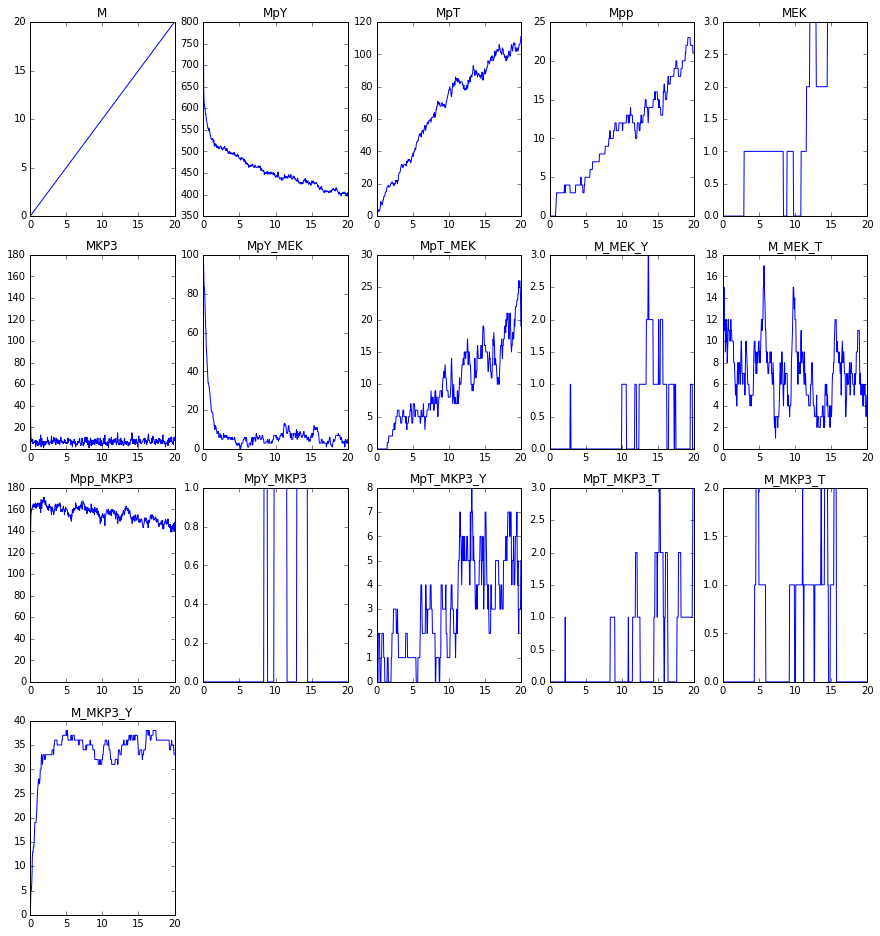

In [13]:
ns = len(stoch_model.listOfSpecies)
plt.figure(figsize=(15,4*int(math.ceil(ns/5.0))))
for n,s in enumerate(stoch_model.listOfSpecies):
    plt.subplot(int(math.ceil(ns/5.0)),5,n+1)
    plt.plot(stoch_model.tspan,sresults[0][:,n])
    plt.title(s)